In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params, load_params
from multi_group_simulation import MultiGroupSimulation
import datetime
import pandas as pd
import pprint

In [2]:
base_params_post_movein = load_params('../src/simulations_v2/params/apr7calibration/faculty_staff_post_movein_private.yaml')[1]
base_params_selfiso = load_params('../src/simulations_v2/params/quarantine_analysis/oct12quarantine/ug_self_iso.yaml')[1]
base_params_free = load_params('../src/simulations_v2/params/apr7calibration/faculty_staff_pre_semester_private.yaml')[1]

C:\Users\briliu\temp\group-testing/src/simulations_v2\load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
C:\Users\briliu\temp\group-testing/src/simulations_v2\load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


In [3]:
pprint.pprint(base_params_free)
base_params_free['daily_outside_infection_p'] = 0

{'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E49D0>,
 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4AF0>,
 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4B80>,
 'cases_isolated_per_contact': 0.255,
 'cases_quarantined_per_contact': 2.5,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'daily_outside_infection_p': 0,
 'days_between_tests': 1,
 'expected_contacts_per_day': 10,
 'exposed_infection_p': 0.018,
 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4A60>,
 'initial_E_count': 0,
 'initial_ID_count': 0,
 'initial_ID_prevalence': 0,
 'initial_SyID_mild_count': 0,
 'initial_SyID_severe_count': 0,
 'initial_pre_ID_count': 0,
 'max_time_ID': 8,
 'max_time_SyID_mild': 20,
 'max_time_SyID_severe': 20,
 'max_time_exposed': 7,
 'max_time_pre_ID': 4,
 'mild_severity_levels': 1,
 'mil

In [4]:
pprint.pprint(base_params_post_movein)

{'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4280>,
 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4310>,
 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E43A0>,
 'cases_isolated_per_contact': 0.255,
 'cases_quarantined_per_contact': 2.5,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'daily_outside_infection_p': 0,
 'days_between_tests': 1,
 'expected_contacts_per_day': 10,
 'exposed_infection_p': 0.018,
 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148CF790>,
 'initial_E_count': 0,
 'initial_ID_count': 0,
 'initial_ID_prevalence': 0,
 'initial_SyID_mild_count': 0,
 'initial_SyID_severe_count': 0,
 'initial_pre_ID_count': 0,
 'max_time_ID': 8,
 'max_time_SyID_mild': 20,
 'max_time_SyID_severe': 20,
 'max_time_exposed': 7,
 'max_time_pre_ID': 4,
 'mild_severity_levels': 1,
 'mil

In [5]:
print(base_params_selfiso)

{'severity_prevalence': array([0.52 , 0.472, 0.006, 0.002]), 'population_size': 2200, 'initial_ID_prevalence': 0, 'max_time_ID': 8, 'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4670>, 'max_time_SyID_mild': 20, 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E45E0>, 'max_time_SyID_severe': 20, 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4700>, 'max_time_exposed': 7, 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000297148E4790>, 'exposed_infection_p': 0.017, 'expected_contacts_per_day': 5.5, 'daily_outside_infection_p': 2.2e-05, 'mild_symptoms_daily_self_report_p': 0, 'severe_symptoms_daily_self_report_p': 0.18, 'sample_QI_exit_function': <function binomial_exit_function.<locals>.<lambda> at 0x00000297148E4820>, 'sample_QS_exit_function': <function binomial_exit_function.<locals>.<lambda> at 0x0000029714

In [6]:
outside_infection_week = pd.read_csv('../src/simulations_v2/params/apr7calibration/employee_outside_infections_by_week.csv')
outside_infection_week['weekly_outside_cases'] = outside_infection_week['weekly_outside_cases']/(7*(10283))
outside_infection_week.columns = ['week_since_sem_start','weekly_outside_cases']
outside_infection_week

,week_since_sem_start,weekly_outside_cases
0,2,0.000014
1,5,0.000056
2,6,0.000097
3,7,0.000014
4,8,0.000125
5,9,0.000083
6,10,0.000125
7,11,0.000194
8,12,0.000167
9,13,0.000320


In [7]:
from analysis_helpers import binomial_exit_function
base_params_selfiso['population_size'] = 0
base_params_free['population_size'] = 10283 

base_params_free['sample_QI_exit_function'] = binomial_exit_function(0)
base_params_post_movein['sample_QI_exit_function'] = binomial_exit_function(0)

init_pop_count = 10283
new_population_counts = [int(count) for count in """0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0""".split('\n')]

movein_contact_matrix = np.matrix(
    [[base_params_free['expected_contacts_per_day'], 0],
    [0, base_params_selfiso['expected_contacts_per_day']]])


from dynamic_population_sim_outside_infection import DynamicPopulationSim

def init_movein_sim(transmissions_per_contact, isolations_per_trace=None, outside_infection_week = None):
    avg_init_cases = 0
    infxn_prob = avg_init_cases / (sum(new_population_counts) + init_pop_count)
    base_params = base_params_free.copy()
    init_exposed =  np.random.binomial(init_pop_count, infxn_prob)
    base_params['initial_E_count'] = init_exposed
    base_params['exposed_infection_p'] = transmissions_per_contact
    base_params_post_movein['exposed_infection_p'] = transmissions_per_contact
    base_params_post_movein['outside_infection_p_array'] = outside_infection_week
    
    if isolations_per_trace != None:
        base_params_free['cases_isolated_per_contact'] = isolations_per_trace
        base_params_post_movein['cases_isolated_per_contact']=isolations_per_trace
    free_group_population_dynamics = {}
    movein_time_horizon = 18 # 8/16 through 9/2
    new_case_exposed_rate = 1
    for t in range(movein_time_horizon):
        new_pop = new_population_counts[t]
        new_cases = np.random.binomial(new_pop, infxn_prob)
        new_exposed = np.random.binomial(new_cases, new_case_exposed_rate)
        free_group_population_dynamics[t] = {'S': new_pop - new_exposed, 'E': new_exposed, 'ID': new_cases- new_exposed}
        
    dynamic_pop_sim = DynamicPopulationSim(
        base_params,
        base_params_selfiso,
        base_params_post_movein,
        movein_contact_matrix,
        movein_time_horizon,
        free_group_population_dynamics,
        {}
    )
    return dynamic_pop_sim

In [8]:
#private

actuals = pd.read_csv('https://raw.githubusercontent.com/peter-i-frazier/group-testing/master/src/simulations_v2/params/jan4calibration/actual_counts_group_4_extended_period.csv')
actual_counts = actuals['cum_case_count']
len(actual_counts)



148

Text(0.5, 1.0, 'Staff Case Counts')

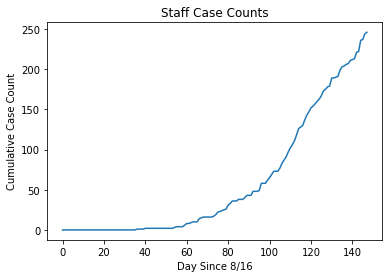

In [9]:
#subtract to center 0,0

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(actual_counts)), actual_counts)
plt.xlabel('Day Since 8/16')
plt.ylabel('Cumulative Case Count')
plt.title('Staff Case Counts')

In [10]:
import pandas as pd

def sample_movein_trajectory(transmission_p, isos_per_trace=None,outside_infection_week = None):
    dynamic_pop_sim = init_movein_sim(transmission_p, isos_per_trace,outside_infection_week)
    # for each day
    for i in range(len(actual_counts)-1):
        dynamic_pop_sim.step()
    movein_df = dynamic_pop_sim.movein_sim.sims[0].sim_df
    post_movein_df = dynamic_pop_sim.post_movein_sim.sim_df

    
    post_movein_df.index = range(movein_df.shape[0]-1, post_movein_df.shape[0] + movein_df.shape[0] -1)
    df = pd.concat([movein_df, post_movein_df[1:]])

    return list(df['QI'])

def sample_trajectories(transmission_p, ntrajectories, isos_per_trace=None, outside_infection_week = None):
    trajectories = []
    for _ in range(ntrajectories):
        t = sample_movein_trajectory(transmission_p, isos_per_trace,outside_infection_week)
        trajectories.append(t)
    return trajectories

from math import sqrt

def score_trajectories_avg(trajectories):
    sse = 0
    avg_traj = np.mean(trajectories,axis = 0)
    for i in range(0,len(avg_traj)):
        sse = sse + (avg_traj[i] - actual_counts[i])**2
    return sse/len(avg_traj)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_trajectories(trajs, title):
    plt.figure(figsize=(10,6))
    label='Simulated Case Counts'
    for t in trajs:
        plt.plot(range(len(t)), t, color='blue', alpha=0.5, label=label)
        label=None
    plt.plot(range(len(actual_counts)), actual_counts, color='red', linewidth=3, 
             alpha=0.7, label='Observed Case Counts')
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

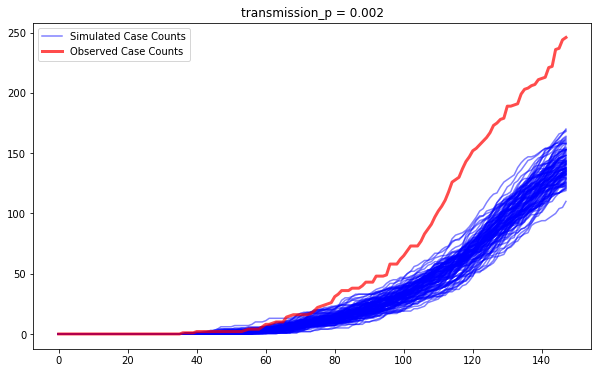

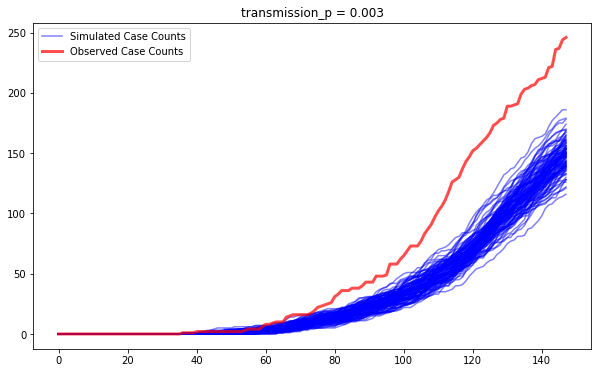

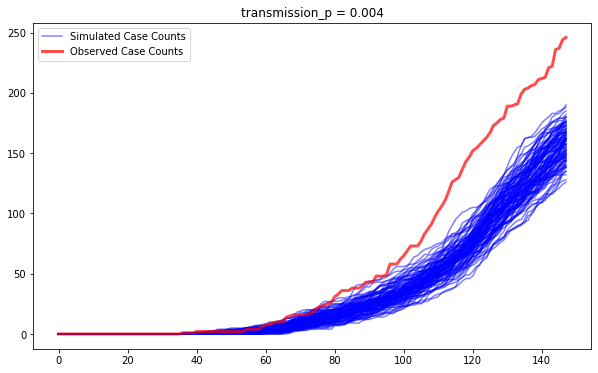

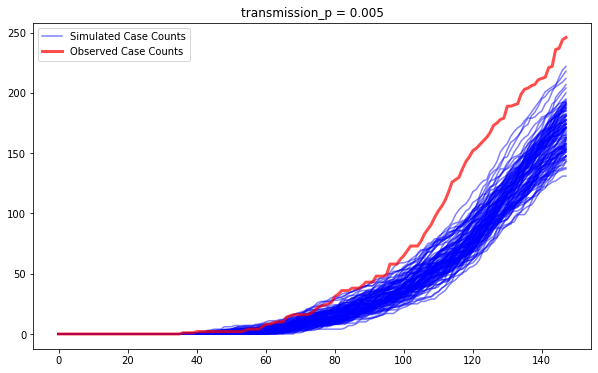

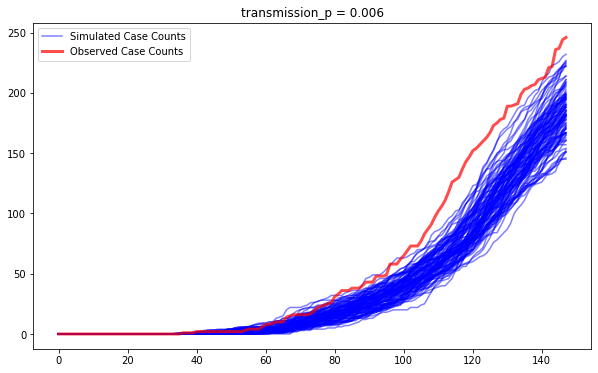

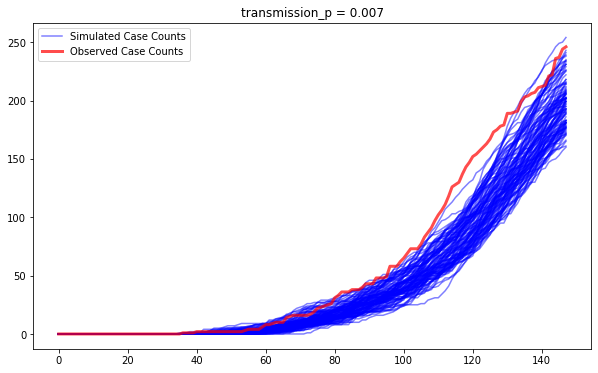

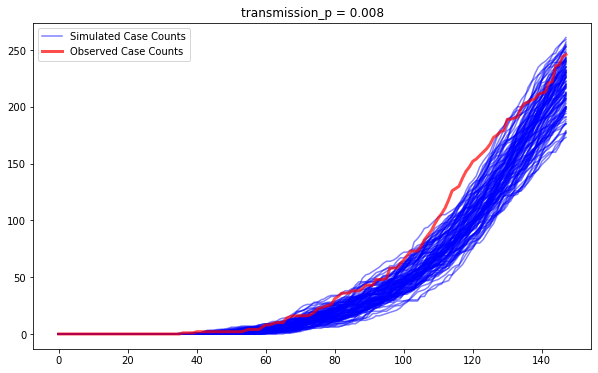

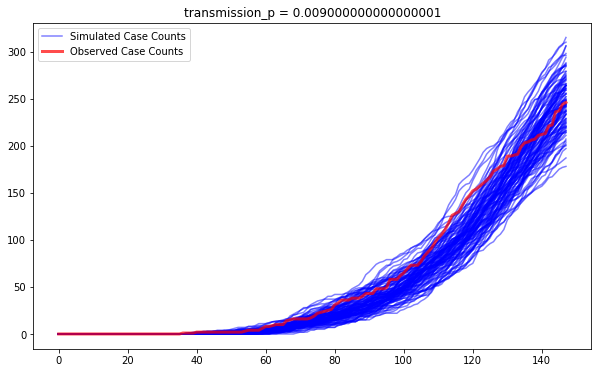

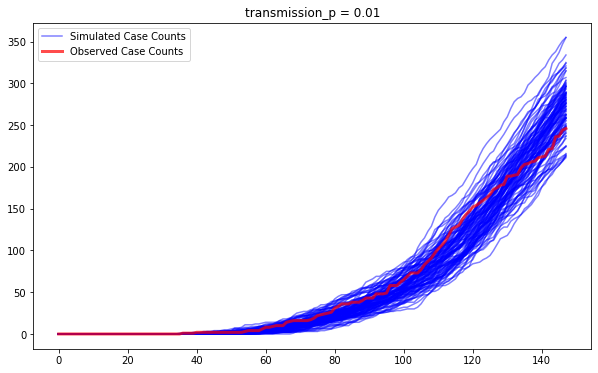

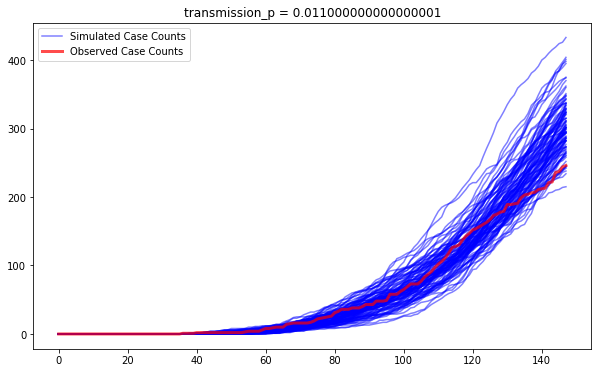

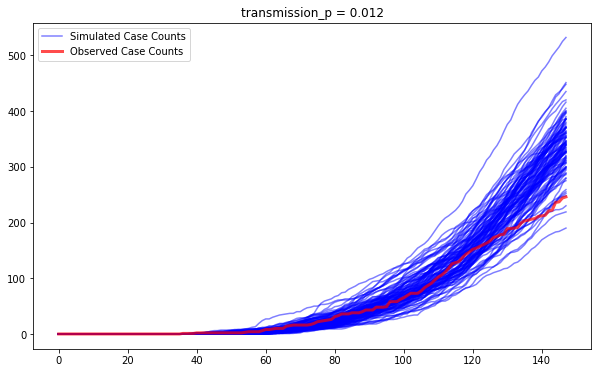

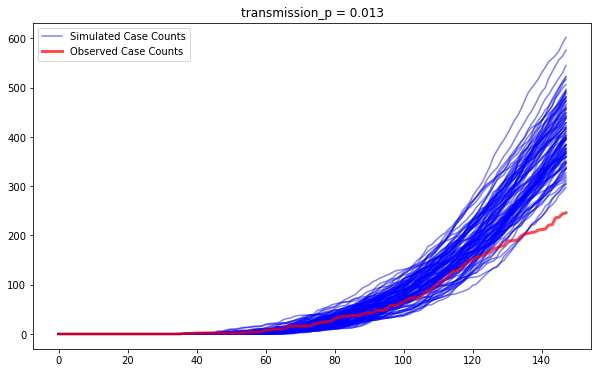

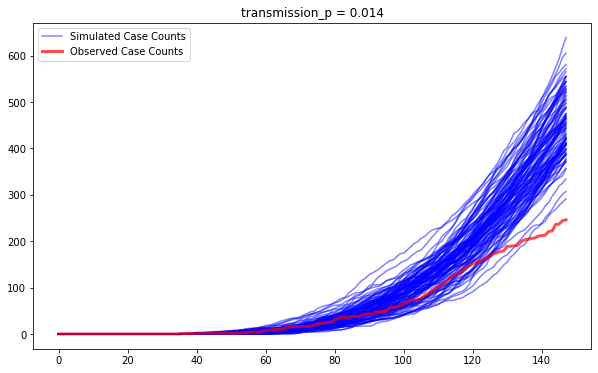

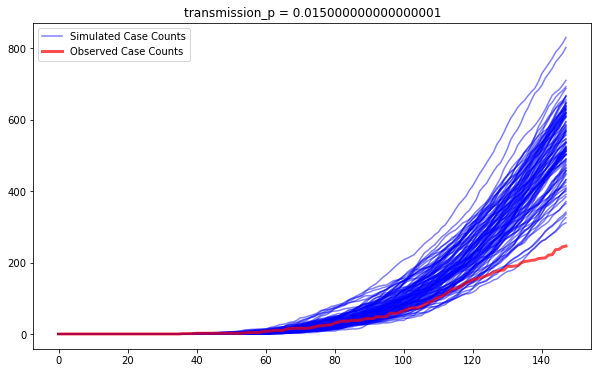

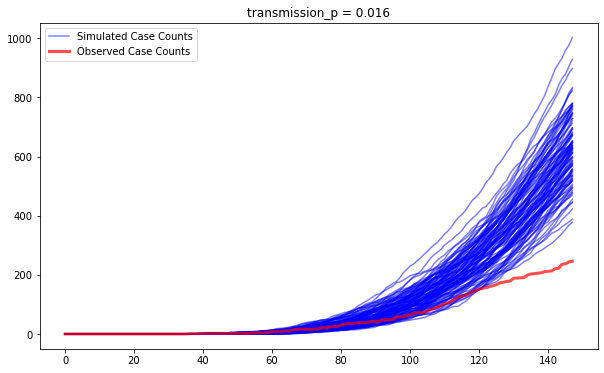

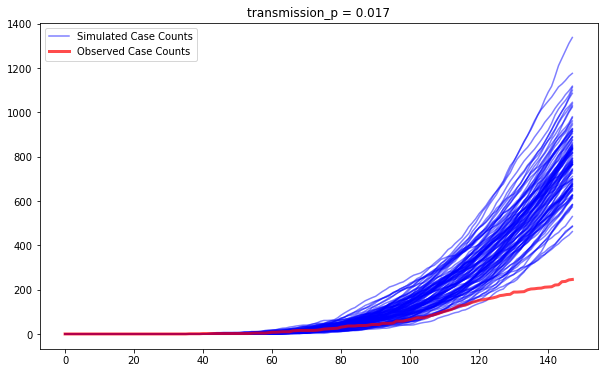

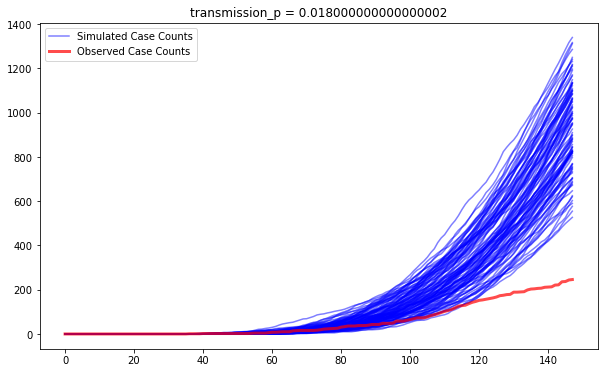

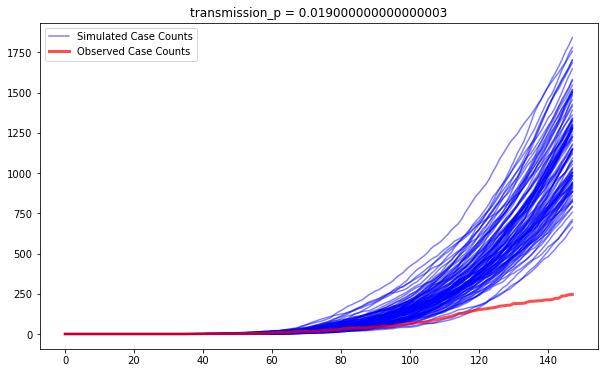

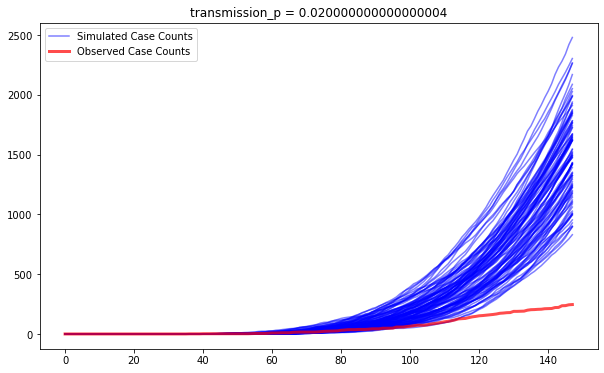

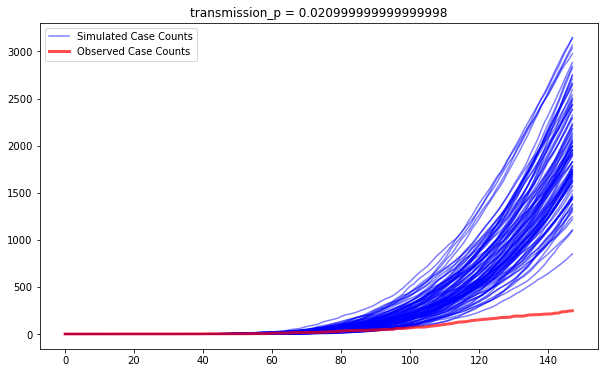

In [12]:
import gc
#transmission_ps = [0.0025,0.005,0.0075,0.01,0.0125,0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275 , 0.03,.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05]
transmission_ps = np.arange(0.002,0.021,0.001)
results = {}
scores = {}
ntrajectories = 100
df_results = []
df_lines = pd.DataFrame()
for transmission_p in transmission_ps:
    gc.collect()
    trajs = sample_trajectories(transmission_p, ntrajectories,None,outside_infection_week)
    results[transmission_p] = trajs
    score = score_trajectories_avg(trajs)
    scores[transmission_p] = score
    plot_trajectories(trajs, "transmission_p = {}".format(transmission_p))
    df_results.append([transmission_p,score])
    trajs2 = pd.DataFrame(trajs)
    trajs2['p'] = transmission_p
    df_lines = df_lines.append(trajs2)

In [13]:
df_lines

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,p
0,0,0,0,0,0,0,0,0,0,0,...,116,118,120,128,131,135,138,143,144,0.002
1,0,0,0,0,0,0,0,0,0,0,...,109,110,114,118,120,121,124,124,125,0.002
2,0,0,0,0,0,0,0,0,0,0,...,143,146,148,149,151,155,157,159,160,0.002
3,0,0,0,0,0,0,0,0,0,0,...,132,132,133,134,135,137,139,142,142,0.002
4,0,0,0,0,0,0,0,0,0,0,...,134,135,136,138,139,142,145,146,148,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,1239,1273,1312,1352,1398,1445,1488,1532,1578,0.021
96,0,0,0,0,0,0,0,0,0,0,...,1672,1716,1759,1815,1872,1932,1983,2041,2097,0.021
97,0,0,0,0,0,0,0,0,0,0,...,994,1036,1075,1121,1160,1217,1263,1295,1342,0.021
98,0,0,0,0,0,0,0,0,0,0,...,934,971,1018,1070,1117,1164,1217,1268,1319,0.021


In [14]:
df_lines.to_csv('FS_Timeseries.csv')

In [15]:
df_lines['p'].unique()

array([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 ,
       0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019,
       0.02 , 0.021])

In [16]:
df_results = pd.DataFrame(df_results,columns = ['transmission_p','score'])
df_results.to_csv('FS_results.csv')

Text(0.5, 1.0, 'Faculty and Staff Callibration')

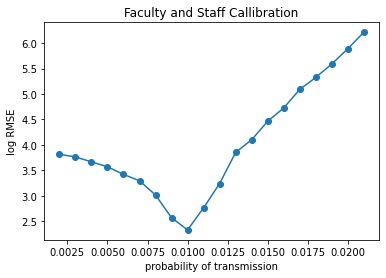

In [17]:
plt.plot(df_results['transmission_p'],np.log(np.sqrt(df_results['score'])))
plt.scatter(df_results['transmission_p'],np.log(np.sqrt(df_results['score'])))
plt.xlabel('probability of transmission')
plt.ylabel('log RMSE')
plt.title('Faculty and Staff Callibration')

In [18]:
df_results

,transmission_p,score
0,0.002,2054.153872
1,0.003,1854.483301
2,0.004,1527.164552
3,0.005,1258.720461
4,0.006,932.942006
5,0.007,725.288971
6,0.008,414.241176
7,0.009,169.441027
8,0.010,104.998626
9,0.011,249.695662
